<b>Using data create a model (Linear Regression) to predict a
house&#39;s value. We want to be able to understand what creates value
in a house, as though we were a real estate developer. The project
should follow the guideline as:</b>
1. Examine and explore data (visualization, interactions among
features)
2. Apply the model for prediction with holdout and cross
validation
3. Using PCA, apply the model with holdout and cross
validation
4. Visualize the residue and homoscedasticity
5. Tune the model if necessary
6. Write up analysis for each section (for example, explain why
the model is overfitting, explain why applying PCA is better,
etc.)
7. Include conclusions for summary

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import rc
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Examine and explore data (visualization, interactions among features)

In [2]:
data=pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
data.shape

(34857, 21)

# There are 34857 rows and 21 columns. This sample is large enough for testing.

In [4]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
pd.set_option('display.max_columns', 500,'display.max_rows', 500)

In [6]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
(data.isnull().sum()/len(data))*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

# Delete columns that missing more than 30%.

In [9]:
del data['BuildingArea']
del data['YearBuilt']
del data['Landsize']
del data['Date']
data=data.dropna()

In [10]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [12]:
data.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,20401,20401,20401.000000,20401,2.040100e+04,20401,20401,20401.000000,20401.000000,20401.000000,20401.000000,20401.000000,20401,20401.000000,20401.000000,20401,20401.000000
unique,338,20035,NaN,3,NaN,5,320,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Nelson,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,491,4,NaN,15352,NaN,13345,2119,NaN,NaN,NaN,NaN,NaN,1880,NaN,NaN,6217,NaN
mean,NaN,NaN,3.065291,NaN,1.088339e+06,NaN,NaN,11.444645,3114.626244,3.049850,1.596392,1.715259,NaN,-37.806842,144.997212,NaN,7508.850007
std,NaN,NaN,0.945657,NaN,6.552566e+05,NaN,NaN,6.866696,115.447538,0.956359,0.702750,0.994518,NaN,0.092208,0.120885,NaN,4411.864798
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.550000e+05,NaN,NaN,6.600000,3046.000000,2.000000,1.000000,1.000000,NaN,-37.861300,144.924900,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.050000e+05,NaN,NaN,10.500000,3087.000000,3.000000,1.000000,2.000000,NaN,-37.799800,145.004500,NaN,6567.000000
75%,NaN,NaN,4.000000,NaN,1.330000e+06,NaN,NaN,14.200000,3152.000000,4.000000,2.000000,2.000000,NaN,-37.748000,145.069500,NaN,10331.000000


In [13]:
data.select_dtypes(['object']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [14]:
obj=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','Postcode']

for i in obj:
    print( str(i) + ':'+ str(len(data[i].value_counts())))

Suburb:338
Address:20035
Type:3
Method:5
SellerG:320
CouncilArea:33
Regionname:8
Postcode:208


# I delete Address column because it's over 500.

In [15]:
del data['Address']

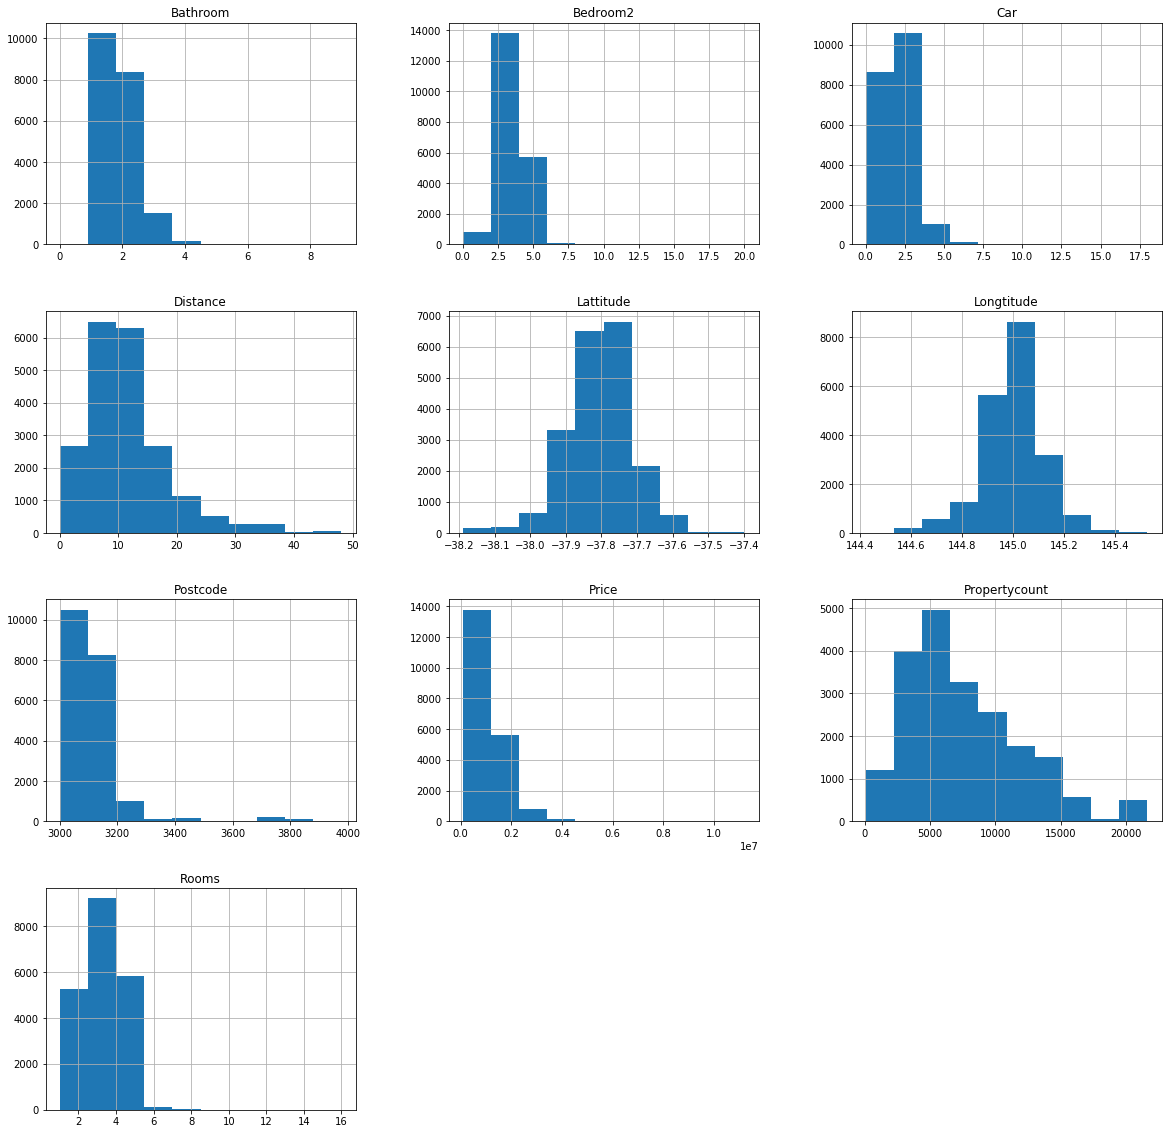

In [16]:
data.hist(figsize=(20,20))
plt.show()

In [29]:
data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

In [30]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

# One hot encoding and minmaxscaler

In [17]:
data.select_dtypes(['object']).columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [18]:
obj=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname','Postcode']

for i in obj:
    data = pd.get_dummies(data, columns=[i])

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [22]:
print(scaler.data_max_)

[ 1.6000000e+01  1.1200000e+07  4.8100000e+01  2.0000000e+01
  9.0000000e+00  1.8000000e+01 -3.7397800e+01  1.4552635e+02
  2.1650000e+04  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00
  1.0000000e+00  1.00000

In [23]:
data1=scaler.transform(data)

In [24]:
data.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Lattitude', 'Longtitude', 'Propertycount', 'Suburb_Abbotsford',
       ...
       'Postcode_3806.0', 'Postcode_3807.0', 'Postcode_3808.0',
       'Postcode_3809.0', 'Postcode_3810.0', 'Postcode_3910.0',
       'Postcode_3975.0', 'Postcode_3976.0', 'Postcode_3977.0',
       'Postcode_3978.0'],
      dtype='object', length=924)

In [25]:
data2=pd.DataFrame(data1, columns=data.columns)

In [26]:
data2.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Botanic Ridge,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brookfield,Suburb_Brooklyn,Suburb_Brunswick,Suburb_Brunswick East,Suburb_Brunswick West,Suburb_Bulla,Suburb_Bulleen,Suburb_Bullengarook,Suburb_Bundoora,Suburb_Burnley,Suburb_Burnside,Suburb_Burnside Heights,Suburb_Burwood,Suburb_Burwood East,Suburb_Cairnlea,Suburb_Camberwell,Suburb_Campbellfield,Suburb_Canterbury,Suburb_Carlton,Suburb_Carlton North,Suburb_Carnegie,Suburb_Caroline Springs,Suburb_Carrum,Suburb_Carrum Downs,Suburb_Caulfield,Suburb_Caulfield East,Suburb_Caulfield North,Suburb_Caulfield South,Suburb_Chadstone,Suburb_Chelsea,Suburb_Chelsea Heights,Suburb_Cheltenham,Suburb_Chirnside Park,Suburb_Clarinda,Suburb_Clayton,Suburb_Clayton South,Suburb_Clifton Hill,Suburb_Clyde North,Suburb_Coburg,Suburb_Coburg North,Suburb_Coldstream,Suburb_Collingwood,Suburb_Coolaroo,Suburb_Craigieburn,Suburb_Cranbourne,Suburb_Cranbourne North,Suburb_Cranbourne West,Suburb_Cremorne,Suburb_Croydon,Suburb_Croydon Hills,Suburb_Croydon North,Suburb_Croydon South,Suburb_Dallas,Suburb_Dandenong,Suburb_Dandenong North,Suburb_Deepdene,Suburb_Deer Park,Suburb_Delahey,Suburb_Derrimut,Suburb_Diamond Creek,Suburb_Diggers Rest,Suburb_Dingley Village,Suburb_Docklands,Suburb_Doncaster,Suburb_Doncaster East,Suburb_Donvale,Suburb_Doreen,Suburb_Doveton,Suburb_Eaglemont,Suburb_East Melbourne,Suburb_Edithvale,Suburb_Elsternwick,Suburb_Eltham,Suburb_Eltham North,Suburb_Elwood,Suburb_Emerald,Suburb_Endeavour Hills,Suburb_Epping,Suburb_Essendon,Suburb_Essendon North,Suburb_Essendon West,Suburb_Eumemmerring,Suburb_Eynesbury,Suburb_Fairfield,Suburb_Fawkner,Suburb_Ferntree Gully,Suburb_Ferny Creek,Suburb_Fitzroy,Suburb_Fitzroy North,Suburb_Flemington,Suburb_Footscray,Suburb_Forest Hill,Suburb_Frankston,Suburb_Frankston North,Suburb_Frankston South,Suburb_Gardenvale,Suburb_Gisborne,Suburb_Gisborne South,Suburb_Gladstone Park,Suburb_Glen Huntly,Suburb_Glen Iris,Suburb_Glen Waverley,Suburb_Glenroy,Suburb_Gowanbrae,Suburb_Greensborough,Suburb_Greenvale,Suburb_Hadfield,Suburb_Hallam,Suburb_Hampton,Suburb_Hampton East,Suburb_Hampton Park,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Healesville,Suburb_Heatherton,Suburb_Heathmont,Suburb_Heidelberg,Suburb_Heidelberg Heights,Suburb_Heidelberg West,Suburb_Highett,Suburb_Hillside,Suburb_Hoppers Crossing,Suburb_Hughesdale,Suburb_Huntingdale,Suburb_Hurstbridge,Suburb_Ivanhoe,Suburb_Ivanhoe East,Suburb_Jacana,Suburb_Kalkallo,Suburb_Kealba,Suburb_Keilor,Suburb_Keilor Downs,Suburb_Keilor East,Suburb_Keilor Lodge,Suburb_Keilor Park,Suburb_Kensington,Suburb_Kew,Suburb_Kew East,Suburb_Keysborough,Suburb_Kilsyth,Suburb_Kings Park,Suburb_Kingsbury,Suburb_Kingsville,Suburb_Knoxfield,Suburb_Kooyong,Suburb_Kurunjang,Suburb_Lalor,Suburb_Langwarrin,Suburb_Laverton,Suburb_Lilydale,Suburb_Lower Plenty,Suburb_Lynbrook,Suburb_Lysterfield,Suburb_Maidstone,Suburb_Malvern,Suburb_Malvern East,Suburb_Maribyrnong,Suburb_McKinnon,Suburb_Meadow Heights,Suburb_Melbourne,Suburb_Melton,Suburb_Melton South,Suburb_Melton West,Suburb_Mentone,Suburb_Mernda,Suburb_Mickleham,Suburb_Middle Park,Suburb_Mill Park,Suburb_Mitcham,Suburb_Monbulk,Suburb_Mont Albert,Suburb_

# 2. Apply the model for prediction with holdout and cross validation